<a href="https://colab.research.google.com/github/Abhilash-Bee/DeepLearningCertification/blob/main/03_Computer_vision_%26_convolutional_neural_networks_in_TensorFlow_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 **03. Computer vision & convolutional neural networks in TensorFlow Exercises**

1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).
 * What are the key terms? e.g. explain convolution in your own words, pooling in your own words
2. Play around with the "understanding hyperparameters" section in the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-minutes.
  * What is the kernel size?
  * What is the stride?
  * How could you adjust each of these in TensorFlow code?
3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.
4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.


---

---

## **0. Importing necessary packages and Getting the data ready**

### Importing

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

### Getting food data (2 category)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-01-28 14:16:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   112MB/s    in 0.9s    

2024-01-28 14:16:18 (112 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
import zipfile

file = zipfile.ZipFile('/content/pizza_steak.zip')
file.extractall()
file.close()

In [ ]:
# Setting the train and test directory path
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [ ]:
# Walking through the train and test folder
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}')

There are 2 directories and 0 files in pizza_steak
There are 2 directories and 0 files in pizza_steak/test
There are 0 directories and 250 files in pizza_steak/test/pizza
There are 0 directories and 250 files in pizza_steak/test/steak
There are 2 directories and 0 files in pizza_steak/train
There are 0 directories and 750 files in pizza_steak/train/pizza
There are 0 directories and 750 files in pizza_steak/train/steak


In [ ]:
# Number of files in 'train' directory
print(f"Train pizza files are: {len(os.listdir(train_dir+'/pizza'))}")
print(f"Test pizza files are: {len(os.listdir(test_dir+'/pizza'))}")
print()
print(f"Train steak files are: {len(os.listdir(train_dir+'/steak'))}")
print(f"Test steak files are: {len(os.listdir(train_dir+'/steak'))}")

Train pizza files are: 750
Test pizza files are: 250

Train steak files are: 750
Test steak files are: 750


### Getting class names

In [ ]:
# Getting the class names
import pathlib

folders = pathlib.Path(train_dir)
class_names = np.array(sorted(folder.name for folder in folders.glob('*')))
class_names

array(['pizza', 'steak'], dtype='<U5')

### **Visualize 2 random image from random class**

In [ ]:
def view_random_images(path):
  class_1 = random.choice(class_names)
  class_2 = random.choice(class_names)

  image_1 = random.sample(os.listdir(path + class_1), 1)[0]
  image_2 = random.sample(os.listdir(path + class_2), 1)[0]

  img_1 = mpimg.imread(path + class_1 + '/' + image_1)
  img_2 = mpimg.imread(path + class_2 + '/' + image_2)

  fix, ax = plt.subplots(1, 2, figsize=(10, 6))

  ax[0].imshow(img_1)
  ax[0].set_title(image_1)
  ax[0].set_xlabel(class_1)
  ax[0].set_xticks([])
  ax[0].set_yticks([])

  ax[1].imshow(img_2)
  ax[1].set_title(image_2)
  ax[1].set_xlabel(class_2)
  ax[1].set_xticks([])
  ax[1].set_yticks([])

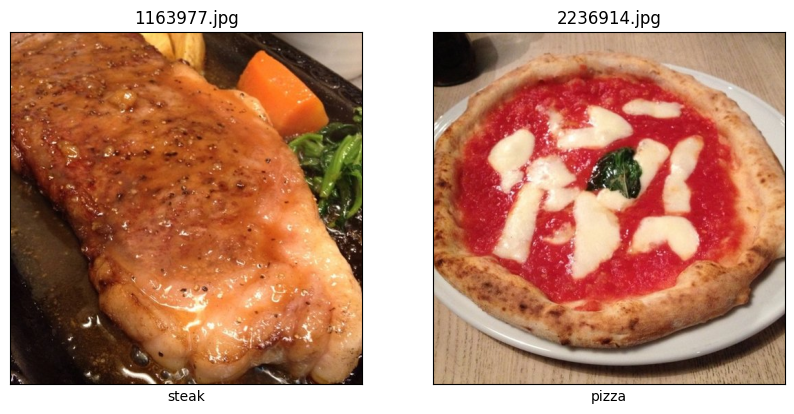

In [ ]:
view_random_images(train_dir)

---

---

## **1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).**
 * What are the key terms? e.g. explain convolution in your own words, pooling in your own words


---

---

## **2. Play around with the "understanding hyperparameters" section in the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-minutes.**
  * What is the kernel size?
  * What is the stride?
  * How could you adjust each of these in TensorFlow code?

---

---

## **3. Use Pizza-Steak folder photos of two different things and build your own CNN image classifier using the techniques we've built here.**

### Preprocessing the data

In [ ]:
image = random.sample(os.listdir(train_dir + 'pizza/'), 1)[0]
image = train_dir + 'pizza/' + image
image = mpimg.imread(image)
image

array([[[171, 119,  59],
        [176, 124,  64],
        [179, 128,  65],
        ...,
        [253, 249, 204],
        [254, 247, 201],
        [254, 247, 201]],

       [[181, 129,  69],
        [179, 127,  67],
        [177, 126,  63],
        ...,
        [253, 249, 204],
        [254, 247, 203],
        [254, 247, 201]],

       [[206, 154,  94],
        [197, 145,  85],
        [190, 139,  76],
        ...,
        [255, 249, 205],
        [255, 248, 204],
        [255, 248, 204]],

       ...,

       [[202, 133,  58],
        [202, 133,  58],
        [205, 133,  57],
        ...,
        [251, 190,  84],
        [248, 187,  81],
        [249, 188,  82]],

       [[202, 132,  60],
        [203, 134,  59],
        [202, 133,  56],
        ...,
        [251, 190,  84],
        [249, 187,  84],
        [251, 189,  86]],

       [[205, 135,  63],
        [205, 136,  61],
        [199, 130,  55],
        ...,
        [247, 186,  80],
        [247, 185,  82],
        [248, 186,  83]]

In [ ]:
image.shape

(512, 382, 3)

In [ ]:
image.min(), image.max()

(0, 255)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.)

train_data = datagen.flow_from_directory(train_dir,
                                         target_size=(224, 224),
                                         class_mode='binary',
                                         batch_size=32)

test_data = datagen.flow_from_directory(test_dir,
                                       target_size=(224, 224),
                                       class_mode='binary',
                                       batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
image, label = train_data.next()
image.shape, label.shape

((32, 224, 224, 3), (32,))

In [ ]:
image

array([[[[0.9725491 , 0.9843138 , 0.9490197 ],
         [0.97647065, 1.        , 0.9725491 ],
         [0.9333334 , 0.9921569 , 0.9725491 ],
         ...,
         [0.8117648 , 0.93725497, 0.9803922 ],
         [0.80392164, 0.9176471 , 0.9725491 ],
         [0.79215693, 0.8980393 , 0.96470594]],

        [[0.9607844 , 0.98823535, 0.9607844 ],
         [0.95294124, 0.9960785 , 0.9803922 ],
         [0.9058824 , 0.9803922 , 0.9725491 ],
         ...,
         [0.8000001 , 0.92549026, 0.97647065],
         [0.80392164, 0.9176471 , 0.9803922 ],
         [0.7960785 , 0.90196085, 0.97647065]],

        [[0.9215687 , 0.97647065, 0.97647065],
         [0.9215687 , 0.9921569 , 0.9921569 ],
         [0.8941177 , 0.98823535, 0.9960785 ],
         ...,
         [0.7411765 , 0.8705883 , 0.93725497],
         [0.77647066, 0.8862746 , 0.9686275 ],
         [0.7803922 , 0.89019614, 0.9725491 ]],

        ...,

        [[0.42352945, 0.48235297, 0.5019608 ],
         [0.43921572, 0.49803925, 0.5176471 ]

In [ ]:
label

array([0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
      dtype=float32)

### Prepare with the old method **Dense approach** instead of **CNN approach** (Model - 1)

In [ ]:
# Create the model
model_1 = Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer=Adam(),
                loss=BinaryCrossentropy(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 508ms/step - loss: 5.1318 - accuracy: 0.6160 - val_loss: 0.5059 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 23s 493ms/step - loss: 0.7348 - accuracy: 0.7100 - val_loss: 0.7334 - val_accuracy: 0.7220
Epoch 3/5
47/47 [==============================] - 25s 532ms/step - loss: 0.8160 - accuracy: 0.7060 - val_loss: 0.5217 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 25s 530ms/step - loss: 0.5355 - accuracy: 0.7673 - val_loss: 0.5445 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 27s 562ms/step - loss: 0.6467 - accuracy: 0.7247 - val_loss: 0.9191 - val_accuracy: 0.6340


### Creating function to plot **Loss** and **Accuracy** curve of the model

In [ ]:
def plot_loss_accuracy_curve(history, epochs=5):
  fig, ax = plt.subplots(2, 1, figsize=(8, 11), sharex=True)
  epochs = tf.range(1, epochs + 1)
  y_axis = [[history['loss'], history['val_loss']], [history['accuracy'], history['val_accuracy']]]
  axis = ['Loss', 'Accuracy']
  labels = [['Training loss', 'Test loss'], ['Training accuracy', 'Test accuracy']]
  for i in range(2):
    ax[i].plot(epochs, y_axis[i][0], label=labels[i][0])
    ax[i].plot(epochs, y_axis[i][1], label=labels[i][1])
    ax[i].set_ylabel(axis[i])
    ax[i].set_title('Plotting ' + axis[i] + ' Curve')
    ax[i].legend()

  # Explicitly set sharex for both subplots
  ax[1].set_xlabel('Epoch')

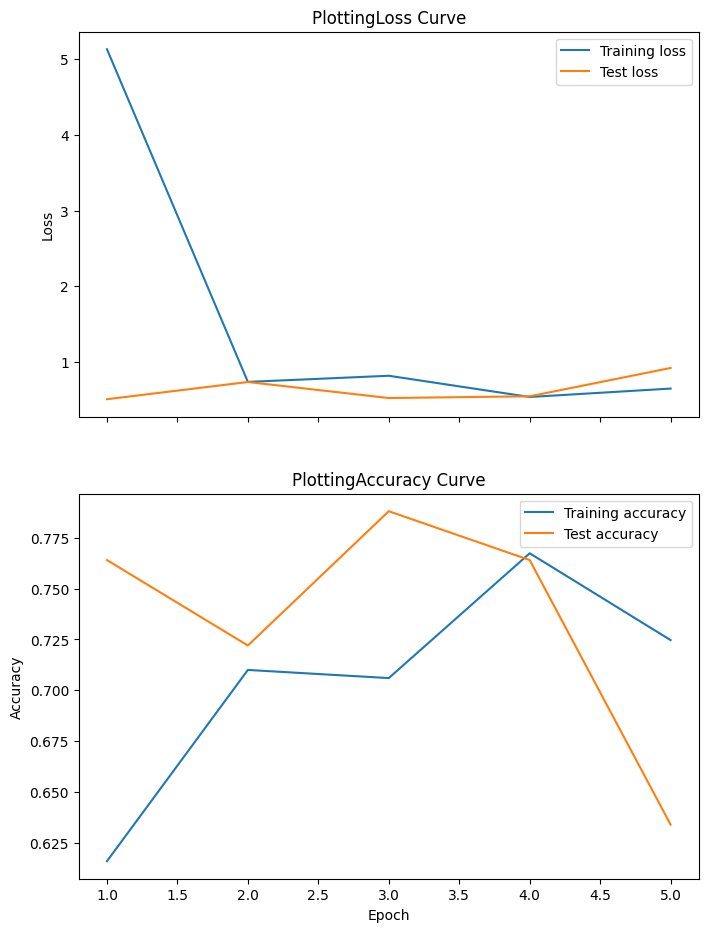

In [ ]:
plot_loss_accuracy_curve(history_1.history)

It looks like our model is **overfitting** because loss on train data is pretty good but loss on test data is very bad.

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Our model is using around **15 Million** params lets compare it with our model when built using **CNN**.

It's also look like training time for each epoch is very higher on an average of **25 sec**. Let us try to activate our **GPU** and try again on model - 1

###Preparing **Model - 2** same as **Model - 1** by activating **GPU**

In [ ]:
# Create the model
model_2 = Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(optimizer=Adam(),
                loss=BinaryCrossentropy(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 112ms/step - loss: 2.7534 - accuracy: 0.6120 - val_loss: 1.4860 - val_accuracy: 0.5800
Epoch 2/5
47/47 [==============================] - 5s 103ms/step - loss: 0.8439 - accuracy: 0.7060 - val_loss: 1.2001 - val_accuracy: 0.6180
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.6310 - accuracy: 0.7373 - val_loss: 0.4691 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.5122 - accuracy: 0.7707 - val_loss: 0.4495 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4860 - accuracy: 0.7933 - val_loss: 0.4253 - val_accuracy: 0.8080


Look at the training time, it has been increased around **5x** by using **GPU**

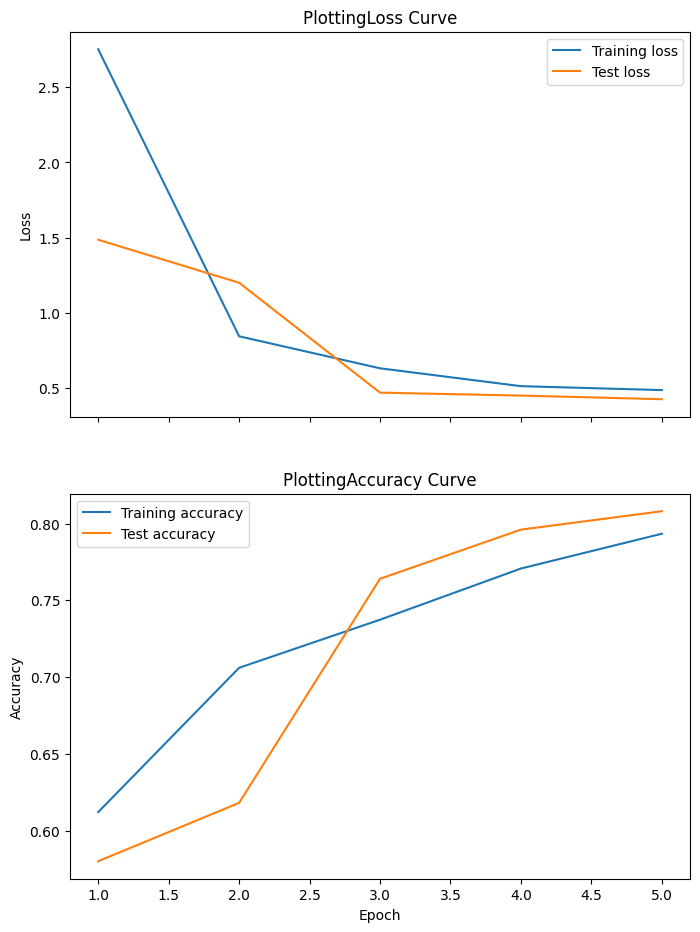

In [ ]:
m# Let's plot the Loss and Accuracy curve
plot_loss_accuracy_curve(history_2.history)

It looks our model is doing pretty okay, but the only problems is our **params**. It is using around **15 Million** params to train the model, which is not so good for **Binary classification problem**.

### Let's use **CNN approach** now, instead of **Normal Dense approach** (Model - 3).

In [ ]:
# Create the model
model_3 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(optimizer=Adam(),
                loss=BinaryCrossentropy(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 125ms/step - loss: 0.5487 - accuracy: 0.7253 - val_loss: 0.3735 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4006 - accuracy: 0.8240 - val_loss: 0.3382 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3676 - accuracy: 0.8493 - val_loss: 0.4320 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3439 - accuracy: 0.8573 - val_loss: 0.3143 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.2841 - accuracy: 0.8840 - val_loss: 0.3306 - val_accuracy: 0.8760


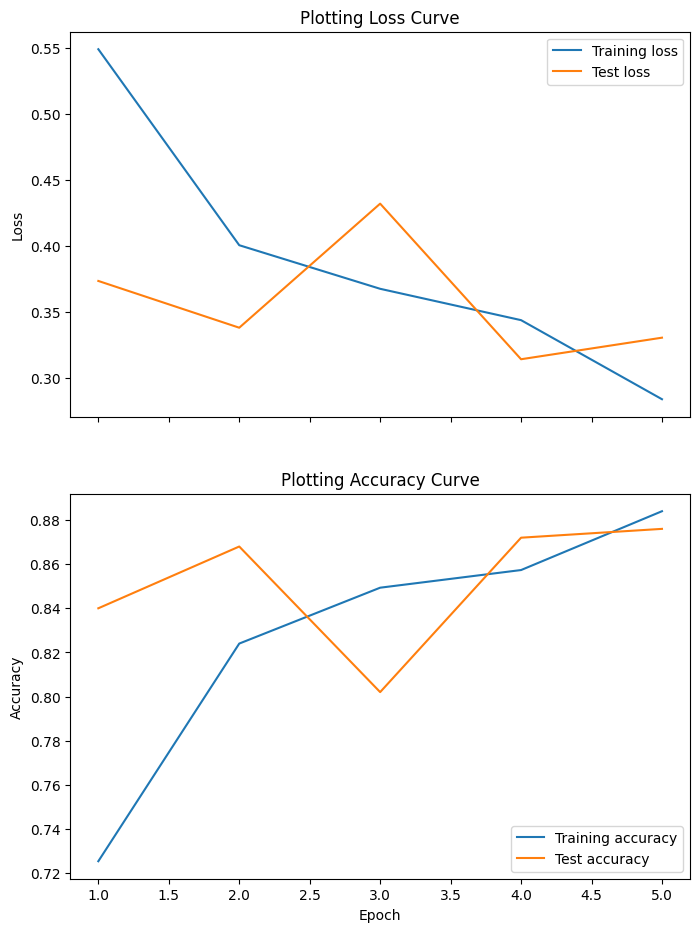

In [ ]:
plot_loss_accuracy_curve(history_3.history)

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                

Whooo!!! look at the params, it is just around **30k**. When we compare with **Model - 1** and **Model - 2** it was **15M**.

Even the accuracy and validation score is also prettiy good, it is around **87%**.

### Let's increase CNN layers and check for improvments (Model - 4)

In [ ]:
# Create the model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#### Creating function of **Compiling** the model

In [ ]:
def compiling(model):
  model.compile(optimizer=Adam(),
                loss=BinaryCrossentropy(),
                metrics=['accuracy'])

  return model

In [ ]:
# Compile the model
model_4 = compiling(model_4)

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 162ms/step - loss: 0.6252 - accuracy: 0.6427 - val_loss: 0.4656 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 8s 163ms/step - loss: 0.4523 - accuracy: 0.7960 - val_loss: 0.3709 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4179 - accuracy: 0.8140 - val_loss: 0.4599 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 9s 181ms/step - loss: 0.3786 - accuracy: 0.8353 - val_loss: 0.3157 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3534 - accuracy: 0.8487 - val_loss: 0.3275 - val_accuracy: 0.8700


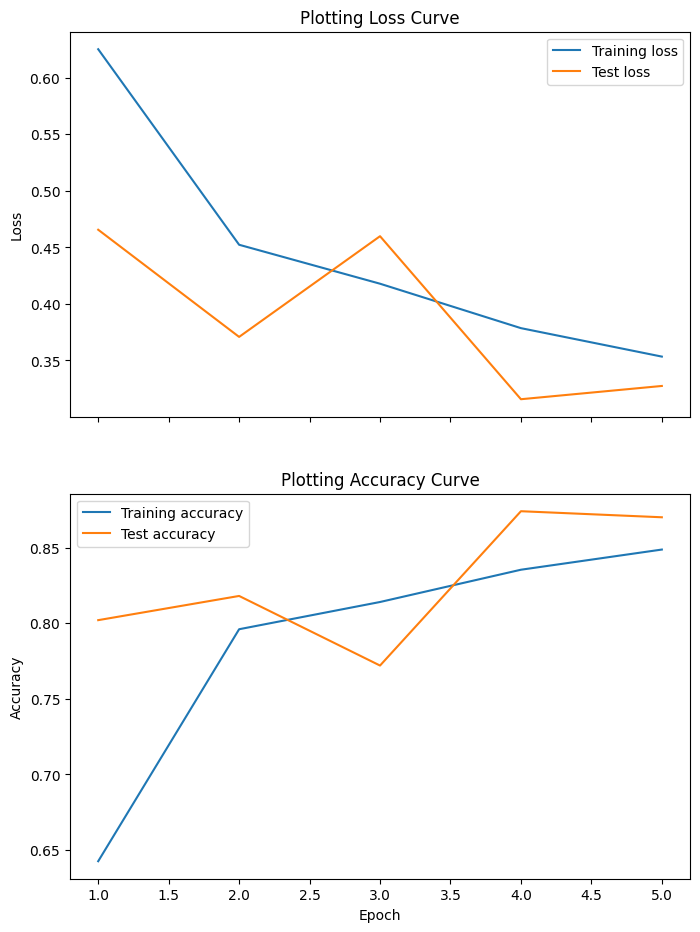

In [ ]:
plot_loss_accuracy_curve(history_4.history)

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 111ms/step - loss: 0.3275 - accuracy: 0.8700


[0.32747361063957214, 0.8700000047683716]

### Let's increase number of **Filters** and **Training for longer** (Model - 5)

In [ ]:
# Create the model
model_5 = Sequential([
    Conv2D(filters=20, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model using function
model_5 = compiling(model_5)

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 10s 172ms/step - loss: 0.5990 - accuracy: 0.6733 - val_loss: 0.4776 - val_accuracy: 0.7960
Epoch 2/10
47/47 [==============================] - 7s 147ms/step - loss: 0.4789 - accuracy: 0.7800 - val_loss: 0.4121 - val_accuracy: 0.8040
Epoch 3/10
47/47 [==============================] - 6s 117ms/step - loss: 0.4326 - accuracy: 0.8120 - val_loss: 0.3605 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 7s 158ms/step - loss: 0.4223 - accuracy: 0.8173 - val_loss: 0.4116 - val_accuracy: 0.8180
Epoch 5/10
47/47 [==============================] - 6s 117ms/step - loss: 0.3808 - accuracy: 0.8367 - val_loss: 0.3453 - val_accuracy: 0.8600
Epoch 6/10
47/47 [==============================] - 6s 133ms/step - loss: 0.3126 - accuracy: 0.8840 - val_loss: 0.3798 - val_accuracy: 0.8500
Epoch 7/10
47/47 [==============================] - 6s 118ms/step - loss: 0.2224 - accuracy: 0.9167 - val_loss: 0.5660 - val_accuracy: 0.7640
Epoch

In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 1s 82ms/step - loss: 0.9058 - accuracy: 0.7780


[0.9058071374893188, 0.777999997138977]

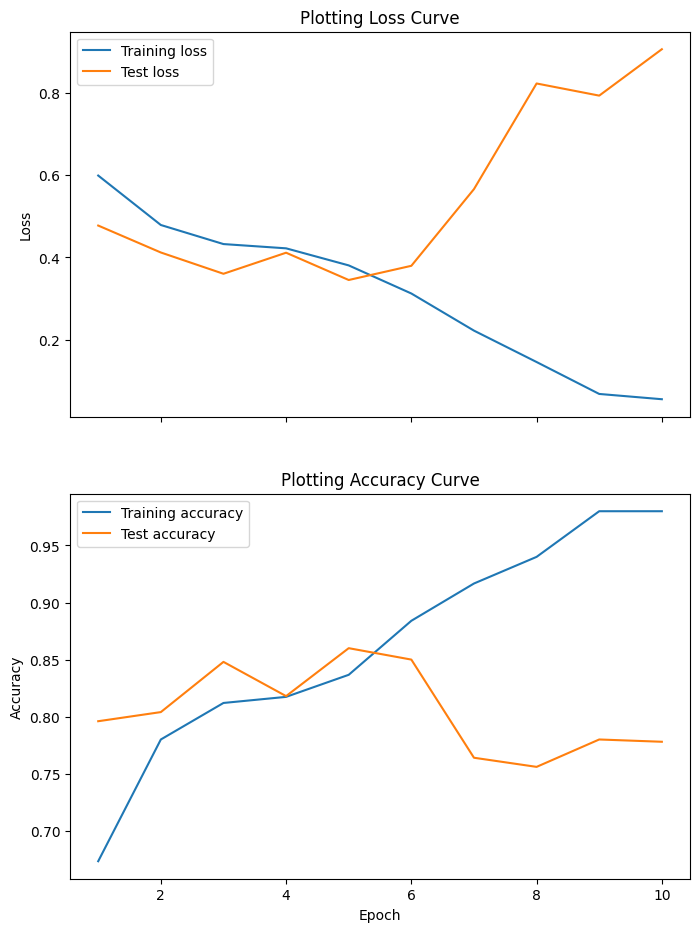

In [ ]:
plot_loss_accuracy_curve(history_5.history, 10)

It's look like increasing **Filters** and **Training for longer** isn't working, let us stick with (Model - 4) has the accuracy of **87%**.

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 81ms/step - loss: 0.3275 - accuracy: 0.8700


[0.32747364044189453, 0.8700000047683716]

### Saving our best model (Model - 4)

In [ ]:
model_4.save('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Food-pizza-steak.keras')

### Loading our best model

In [ ]:
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Food-pizza-steak.keras')

### Plot Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_true = test_data.labels

In [ ]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred = tf.squeeze(tf.round(saved_model.predict(test_data)))

16/16 [==============================] - 1s 79ms/step


In [ ]:
y_pred

<tf.Tensor: shape=(500,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1

In [ ]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
cm

array([[113, 137],
       [112, 138]])

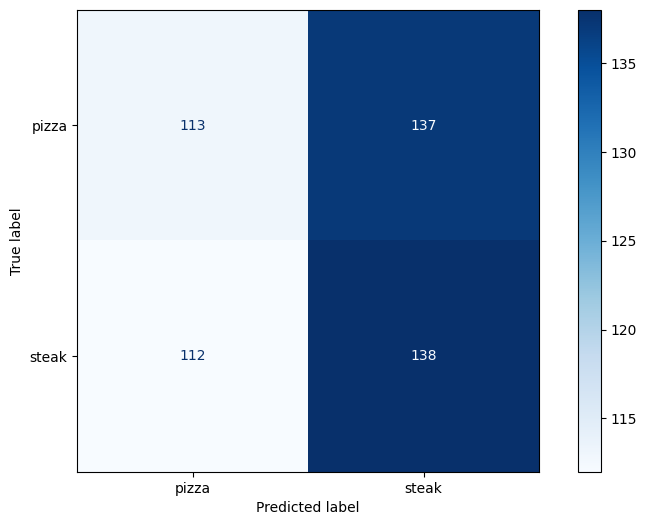

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(ax=ax, cmap=plt.cm.Blues)

### Visualize 4 different images on our test data by predicting with our saved model.

In [ ]:
def view_predicted_image(model=saved_model, class_names=class_names, test_data=test_data):
  batch = [random.choice(test_data) for _ in range(4)]
  rand = [random.randint(0, 31) for _ in range(4)]
  actuals = [(img[0][i], img[1][i]) for img, i in zip(batch, rand)]

  preds = []
  for i in range(4):
    prob = saved_model.predict(tf.expand_dims(actuals[i][0], axis=0))
    preds.append(tf.round(prob))

  fig, ax = plt.subplots(2, 2, figsize=(8, 9))

  k = 0
  for i in range(2):
    for j in range(2):
      ax[i][j].set_title(f'Image - {k + 1}')
      ax[i][j].imshow(actuals[k][0])

      if actuals[k][1] == preds[k]:
        color = 'Green'
      else:
        color = 'Red'

      ax[i][j].set_xlabel(f'Predicted: {class_names[int(preds[k])]}\nActual: {class_names[int(actuals[k][1])]}', color=color)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])

      k = k + 1

1/1 [==============================] - 0s 18ms/step


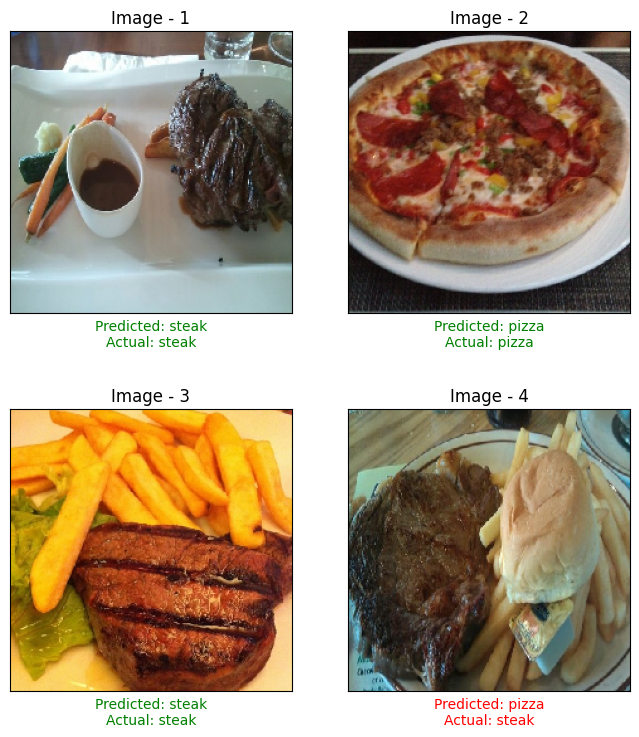

In [ ]:
view_predicted_image()

### Let's perform **Data Augmentation** for **increasing performance** and **overfitting** and fit Model - 6 with our best model i.e., Model - 4

In [ ]:
datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

train_data_augmented = datagen_augmented.flow_from_directory(train_dir,
                                                             target_size=(224, 224),
                                                             class_mode='binary',
                                                             batch_size=32)

train_data_augmented[0][0].shape

Found 1500 images belonging to 2 classes.


(32, 224, 224, 3)

In [ ]:
# Create the model
model_6 = tf.keras.models.clone_model(saved_model)

# Compile the model
model_6 = compiling(model_6)

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 479ms/step - loss: 0.6711 - accuracy: 0.5860 - val_loss: 0.5118 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 24s 504ms/step - loss: 0.5578 - accuracy: 0.7373 - val_loss: 0.4307 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 24s 500ms/step - loss: 0.5153 - accuracy: 0.7593 - val_loss: 0.3853 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 28s 605ms/step - loss: 0.5117 - accuracy: 0.7600 - val_loss: 0.3599 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.4713 - accuracy: 0.7900 - val_loss: 0.3664 - val_accuracy: 0.8500


In [ ]:
model_6.evaluate(test_data)

16/16 [==============================] - 3s 169ms/step - loss: 0.3664 - accuracy: 0.8500


[0.36641526222229004, 0.8500000238418579]

In [ ]:
saved_model.evaluate(test_data)

16/16 [==============================] - 2s 121ms/step - loss: 0.3275 - accuracy: 0.8700


[0.32747364044189453, 0.8700000047683716]

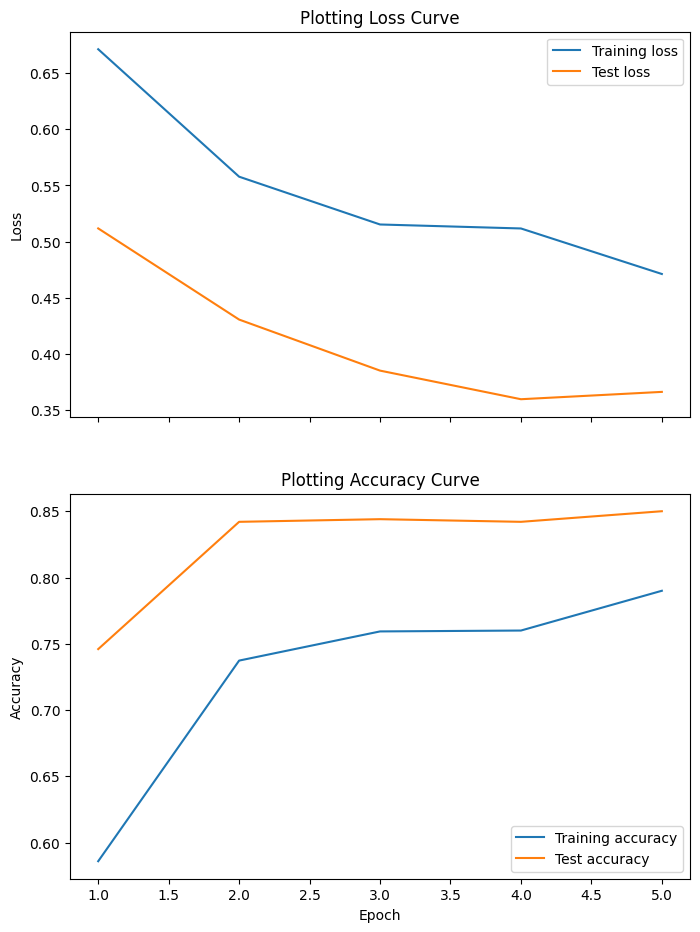

In [ ]:
plot_loss_accuracy_curve(history_6.history)

Seem's like **Loss** and **Accuracy** getting stablized.

---

---

## **4. Create a CNN for 10 class dataset**

### Getting the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-01-29 03:45:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   155MB/s    in 3.3s    

2024-01-29 03:45:54 (150 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile

data = zipfile.ZipFile('10_food_classes_all_data.zip')
data.extractall()
data.close()

In [ ]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
import pathlib
import os

folders = pathlib.Path(train_dir)
class_names = np.array(sorted(folder.name for folder in folders.glob('*')))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

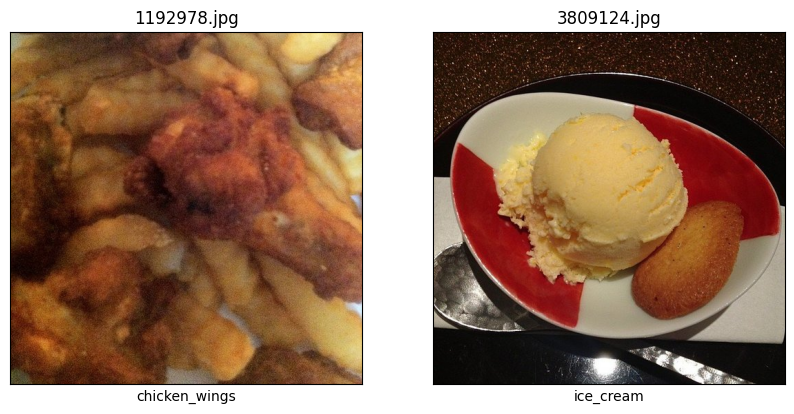

In [ ]:
view_random_images(train_dir)

### Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/225.)

train_data = datagen.flow_from_directory(train_dir,
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode='categorical')

test_data = datagen.flow_from_directory(test_dir,
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Creating the model (Model - 7)

In [ ]:
# Create the model
model_7 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_7.compile(optimizer=Adam(),
                loss=CategoricalCrossentropy(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 37s 132ms/step - loss: 2.1376 - accuracy: 0.2160 - val_loss: 2.0461 - val_accuracy: 0.2744
Epoch 2/5
235/235 [==============================] - 32s 137ms/step - loss: 1.8844 - accuracy: 0.3531 - val_loss: 1.8824 - val_accuracy: 0.3568
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.5376 - accuracy: 0.4888 - val_loss: 1.9673 - val_accuracy: 0.3252
Epoch 4/5
235/235 [==============================] - 29s 125ms/step - loss: 0.8737 - accuracy: 0.7191 - val_loss: 2.4551 - val_accuracy: 0.2984
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.3138 - accuracy: 0.9064 - val_loss: 3.4942 - val_accuracy: 0.2980


Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.**

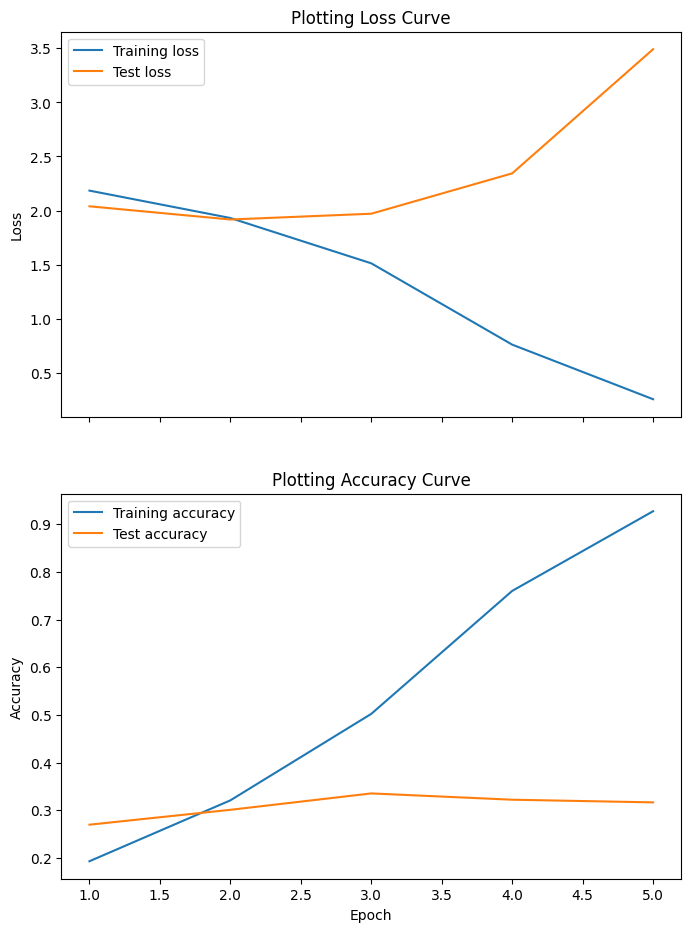

In [ ]:
plot_loss_accuracy_curve(history_7.history)

### Creating the model (Model - 8)

In [ ]:
# Create the model
model_8 = Sequential([
    Conv2D(20, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(optimizer=Adam(),
                loss=CategoricalCrossentropy(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 147ms/step - loss: 2.1245 - accuracy: 0.2304 - val_loss: 1.9462 - val_accuracy: 0.3236
Epoch 2/5
235/235 [==============================] - 34s 143ms/step - loss: 1.9031 - accuracy: 0.3361 - val_loss: 1.9345 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 31s 132ms/step - loss: 1.7005 - accuracy: 0.4165 - val_loss: 1.8004 - val_accuracy: 0.3772
Epoch 4/5
235/235 [==============================] - 31s 132ms/step - loss: 1.4095 - accuracy: 0.5239 - val_loss: 1.9305 - val_accuracy: 0.3752
Epoch 5/5
235/235 [==============================] - 32s 137ms/step - loss: 0.9841 - accuracy: 0.6707 - val_loss: 2.1897 - val_accuracy: 0.3440


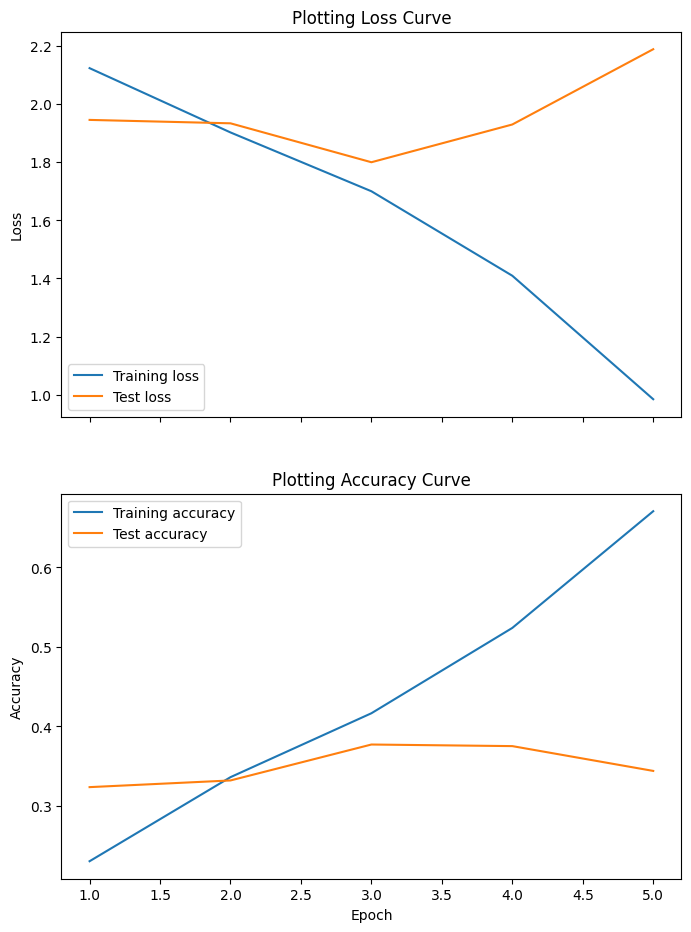

In [ ]:
plot_loss_accuracy_curve(history_8.history)

### Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [ ]:
# Create the model
model_9 = tf.keras.models.clone_model(model_8)

# Compile the model
model_9.compile(optimizer=Adam(),
                loss=CategoricalCrossentropy(),
                metrics=['accuracy'])

# Learning rate callbacks
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[learning_rate_scheduler])

Epoch 1/40
235/235 [==============================] - 39s 155ms/step - loss: 2.1663 - accuracy: 0.1920 - val_loss: 2.0556 - val_accuracy: 0.2528 - lr: 0.0010
Epoch 2/40
235/235 [==============================] - 47s 198ms/step - loss: 1.9580 - accuracy: 0.3011 - val_loss: 1.9103 - val_accuracy: 0.3296 - lr: 0.0011
Epoch 3/40
235/235 [==============================] - 45s 189ms/step - loss: 1.7726 - accuracy: 0.3843 - val_loss: 1.9022 - val_accuracy: 0.3276 - lr: 0.0013
Epoch 4/40
235/235 [==============================] - 53s 224ms/step - loss: 1.5337 - accuracy: 0.4736 - val_loss: 1.9197 - val_accuracy: 0.3404 - lr: 0.0014
Epoch 5/40
235/235 [==============================] - 36s 151ms/step - loss: 1.2125 - accuracy: 0.5915 - val_loss: 2.2323 - val_accuracy: 0.3252 - lr: 0.0016
Epoch 6/40
235/235 [==============================] - 31s 133ms/step - loss: 0.8582 - accuracy: 0.7120 - val_loss: 2.6995 - val_accuracy: 0.3004 - lr: 0.0018
Epoch 7/40
235/235 [==============================] 

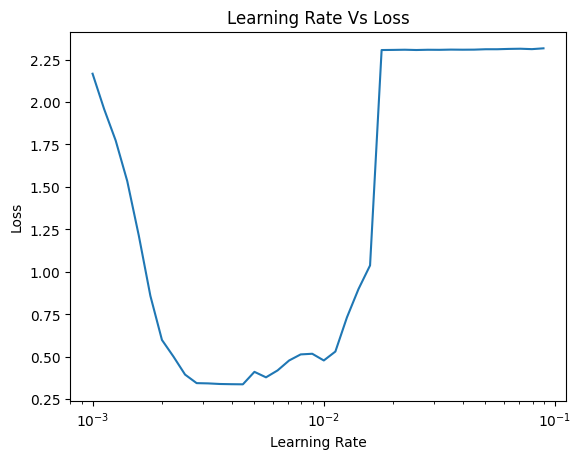

In [ ]:
# Plot learning rate curve
loss = history_9.history['loss']
lrs = 1e-3 * 10 ** (tf.range(40) / 20)
plt.figure()
plt.semilogx(lrs, loss)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Vs Loss')
plt.show()

### Creating the model (Model-10) with Ideal learning rate **0.0018**

In [ ]:
# Create the model
model_10 = Sequential([
    Conv2D(20, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='sigmoid')
])

# Compile the model
model_10.compile(optimizer=Adam(learning_rate=0.0018),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(train_data,
                          epochs=10,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 42s 169ms/step - loss: 2.2455 - accuracy: 0.1449 - val_loss: 2.1438 - val_accuracy: 0.2084
Epoch 2/10
235/235 [==============================] - 32s 138ms/step - loss: 2.0771 - accuracy: 0.2453 - val_loss: 2.0534 - val_accuracy: 0.2692
Epoch 3/10
235/235 [==============================] - 31s 134ms/step - loss: 1.9190 - accuracy: 0.3243 - val_loss: 1.9603 - val_accuracy: 0.3024
Epoch 4/10
235/235 [==============================] - 30s 127ms/step - loss: 1.7355 - accuracy: 0.4023 - val_loss: 1.9791 - val_accuracy: 0.3028
Epoch 5/10
235/235 [==============================] - 30s 129ms/step - loss: 1.4981 - accuracy: 0.4936 - val_loss: 2.1166 - val_accuracy: 0.3108
Epoch 6/10
235/235 [==============================] - 35s 147ms/step - loss: 1.2313 - accuracy: 0.5843 - val_loss: 2.2503 - val_accuracy: 0.3012
Epoch 7/10
235/235 [==============================] - 31s 130ms/step - loss: 0.9127 - accuracy: 0.6883 - val_loss: 2.9551 - val_ac

In [ ]:
model_10.save('Best_model_10_food.keras')

In [ ]:
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Best_model_10_food.keras')

In [ ]:
img = test_data[0][0][9]
img

array([[[0.        , 0.03555556, 0.02222222],
        [0.00444444, 0.02222222, 0.01777778],
        [0.05333333, 0.01333333, 0.02666667],
        ...,
        [0.19111112, 0.02222222, 0.24000001],
        [0.39555556, 0.30222222, 0.5644445 ],
        [0.62666667, 0.59555554, 0.8933334 ]],

       [[0.04444445, 0.04888889, 0.01333333],
        [0.04      , 0.04      , 0.00444444],
        [0.08      , 0.04      , 0.01777778],
        ...,
        [0.23111111, 0.11111111, 0.34666666],
        [0.4577778 , 0.44444445, 0.74222225],
        [0.51111114, 0.5644445 , 0.9022222 ]],

       [[0.18666667, 0.12      , 0.03555556],
        [0.14222223, 0.06666667, 0.        ],
        [0.14222223, 0.04444445, 0.        ],
        ...,
        [0.32444444, 0.26222223, 0.52444446],
        [0.3866667 , 0.4577778 , 0.7911111 ],
        [0.4       , 0.5555556 , 0.9288889 ]],

       ...,

       [[0.61333334, 0.64      , 0.63111115],
        [0.6088889 , 0.63555557, 0.62666667],
        [0.6088889 , 0

In [ ]:
tf.argmax(img)

<tf.Tensor: shape=(), dtype=int64, numpy=3>

In [ ]:
prob = saved_model.predict(tf.expand_dims(img, axis=0))
len(prob[0])

1/1 [==============================] - 0s 50ms/step


10

In [ ]:
maxi = tf.argmax(prob[0]).numpy()
maxi

1

In [ ]:
class_names[maxi]

'chicken_wings'

In [ ]:
def view_predicted_image(model=saved_model, class_names=class_names, test_data=test_data):
  batch = [random.choice(test_data) for _ in range(6)]
  rand = [random.randint(0, 31) for _ in range(6)]
  if len(class_names) == 2:
    actuals = [(img[0][i], img[1][i]) for img, i in zip(batch, rand)]
  else:
    actuals = [(img[0][i], tf.argmax(img[1][i]).numpy()) for img, i in zip(batch, rand)]


  print([actual[1] for actual in actuals])

  preds = []
  for i in range(6):
    prob = saved_model.predict(tf.expand_dims(actuals[i][0], axis=0))
    if len(prob[0]) > 1:
      preds.append(tf.argmax(prob[0]).numpy())
    else:
      preds.append(tf.round(prob))

  print(preds)

  fig, ax = plt.subplots(2, 3, figsize=(12, 9))

  k = 0
  for i in range(2):
    for j in range(3):
      ax[i][j].set_title(f'Image - {k + 1}')
      ax[i][j].imshow(actuals[k][0])

      if actuals[k][1] == preds[k]:
        color = 'Green'
      else:
        color = 'Red'

      ax[i][j].set_xlabel(f'Predicted: {class_names[int(preds[k])]}\nActual: {class_names[int(actuals[k][1])]}', color=color)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])

      k = k + 1

[5, 2, 7, 0, 0, 8]
1/1 [==============================] - 0s 57ms/step
[2, 2, 6, 0, 8, 0]


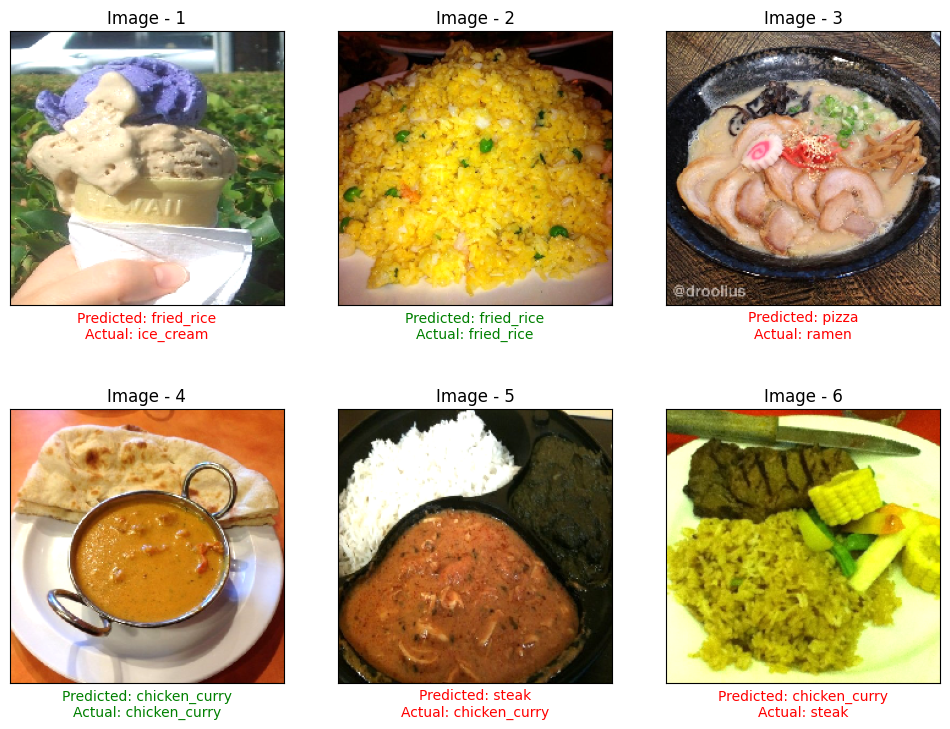

In [ ]:
view_predicted_image()

---

---


# 📖 **03. Computer vision & convolutional neural networks in TensorFlow Extra-curriculum**

* **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=uapdILWYTzE&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3&ab_channel=AlexanderAmini) lecture. This will give you a great intuition behind convolutional neural networks.
* **Watch:** Deep dive on [mini-batch gradient descent](https://youtu.be/-_4Zi8fCZO4) by deeplearning.ai. If you're still curious about why we use **batches** to train models, this technical overview covers many of the reasons why.
* **Read:** [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing.
* **Read:** ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). This paper goes through all of the mathematics running behind the scenes of our convolutional layers.
* **Code practice:** [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.

---

---